# AI 09b Policy Gradient
---

> 학번:
>
> 이름:

Source: https://github.com/wikibook/pytorch-drl

### Import packages
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## 정책반복
---

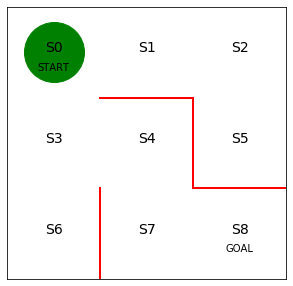

In [ ]:
# 9b.1

# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [ ]:
# 9b.2

# 파라미터 초깃값 theta_0

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8은 목표지점이므로 정책이 없다
                    ])

In [ ]:
# 9b.3

# 파라미터 theta를 행동 정책 pi로 변환하는 함수
# 비율 계산에 소프트맥스 함수 사용
def theta_to_pi_softmax(theta):

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # softmax로 계산하는 코드
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

In [ ]:
# 9b.4

# 초기 정책 pi_0을 계산
pi_0 = theta_to_pi_softmax(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [ ]:
# 9b.5

# 행동 a를 취한 후의 상태 s를 구하는 함수

def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    # pi[s,:]의 확률에 따라 direction 선택
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - 3  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + 3  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]

In [ ]:
# 9b.6

# 미로를 빠져나오는 함수, 상태와 행동의 히스토리를 반환

def goal_maze_ret_s_a(pi):
    # Edit this

In [ ]:
# 9b.7

# 초기 정책으로 미로를 빠져나오기
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점까지 {} 단계".format(str(len(s_a_history) - 1)) )


[[0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 2], [3, 2], [6, 0], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
목표 지점까지 60 단계


In [ ]:
# 9b.8 

# theta를 수정하는 함수

def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                # Edit this

    new_theta = theta + eta * delta_theta

    return new_theta

In [ ]:
# 9b.9

# 정책 수정
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = theta_to_pi_softmax(new_theta)
print(pi)

[[0.         0.50125    0.49875    0.        ]
 [0.         0.49958333 0.         0.50041667]
 [0.         0.         0.50166666 0.49833334]
 [0.33388904 0.33277793 0.33333302 0.        ]
 [0.         0.         0.50041667 0.49958333]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49958333 0.50041667 0.         0.        ]]


In [ ]:
# 9b.9

# 정책 수정
new_theta = update_theta(new_theta, pi_0, s_a_history)
pi = theta_to_pi_softmax(new_theta)
print(pi)

[[0.         0.5124974  0.4875026  0.        ]
 [0.         0.49583343 0.         0.50416657]
 [0.         0.         0.5166605  0.4833395 ]
 [0.33890406 0.32779347 0.33330247 0.        ]
 [0.         0.         0.50416657 0.49583343]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49583343 0.50416657 0.         0.        ]]


In [ ]:
# 9b.10 Edit

# 정책 경사 알고리즘으로 미로 빠져나오기

stop_epsilon = 10**-4  # 정책의 변화가 10^-4 보다 작아지면 학습을 종료

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:  # is_continue가 False가 될 때까지 반복
    
    # Edit this
    
    delta_pi = np.sum(np.abs(new_pi - pi))
    total_steps = len(s_a_history) - 1
    print("정책 변화: {:.5}, 목표 지점까지 {} 단계".format( delta_pi, total_steps ) )

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

정책 변화: 0.0271, 목표 지점까지 8 단계
정책 변화: 0.014097, 목표 지점까지 14 단계
정책 변화: 0.0062604, 목표 지점까지 40 단계
정책 변화: 0.015065, 목표 지점까지 26 단계
정책 변화: 0.0091753, 목표 지점까지 36 단계
정책 변화: 0.016988, 목표 지점까지 10 단계
정책 변화: 0.03303, 목표 지점까지 12 단계
정책 변화: 0.0057695, 목표 지점까지 142 단계
정책 변화: 0.018981, 목표 지점까지 18 단계
정책 변화: 0.01174, 목표 지점까지 46 단계
정책 변화: 0.016912, 목표 지점까지 46 단계
정책 변화: 0.030175, 목표 지점까지 10 단계
정책 변화: 0.049464, 목표 지점까지 4 단계
정책 변화: 0.0078229, 목표 지점까지 50 단계
정책 변화: 0.0070579, 목표 지점까지 60 단계
정책 변화: 0.041517, 목표 지점까지 6 단계
정책 변화: 0.016169, 목표 지점까지 24 단계
정책 변화: 0.0054549, 목표 지점까지 118 단계
정책 변화: 0.025026, 목표 지점까지 18 단계
정책 변화: 0.0045712, 목표 지점까지 62 단계
정책 변화: 0.010127, 목표 지점까지 50 단계
정책 변화: 0.0091429, 목표 지점까지 102 단계
정책 변화: 0.004793, 목표 지점까지 34 단계
정책 변화: 0.011854, 목표 지점까지 90 단계
정책 변화: 0.0074731, 목표 지점까지 90 단계
정책 변화: 0.026665, 목표 지점까지 10 단계
정책 변화: 0.008036, 목표 지점까지 106 단계
정책 변화: 0.015423, 목표 지점까지 24 단계
정책 변화: 0.017069, 목표 지점까지 30 단계
정책 변화: 0.026269, 목표 지점까지 8 단계
정책 변화: 0.007306, 목표 지점까지 60 단계
정책 변화: 0.0054354, 목표 지점까지 132 단계
정

In [ ]:
# 9b.11

# 학습이 끝난 정책을 확인
np.set_printoptions(precision=3, suppress=True)  
print(pi)

[[0.    0.    1.    0.   ]
 [0.    0.386 0.    0.614]
 [0.    0.    0.452 0.548]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]]


In [ ]:
# 9b.12

# 에이전트의 이동 과정을 시각화
# 참고 URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    # 배경 이미지 초기화
    line.set_data([], [])
    return (line,)


def animate(i):
    # 프레임 단위로 이미지 생성
    state = s_a_history[i][0]  # 현재 위치
    x = (state % 3) + 0.5  # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state / 3)  # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x, y)
    return (line,)


#　초기화 함수와 프레임 단위 이미지 생성한수를 사용하여 애니메이션 생성
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())